In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pylab as plt

In [2]:
def load_data_Urbun(sheet):
    df_urban = {}
    years = ['98', '99', '1400', '1401']
    for year in years:
        file_name = f'U{year}.xlsx'
        sheet_name = f'U{year}{sheet}'
        df = pd.read_excel(file_name, sheet_name = sheet_name)
        df_urban[f'U{year}'] = df
    return df_urban

In [3]:
def load_data_Rural(sheet):
    df_Rural = {}
    years = ['98', '99', '1400', '1401']
    for year in years:
        file_name = f'R{year}.xlsx'
        sheet_name = f'R{year}{sheet}'
        df = pd.read_excel(file_name, sheet_name = sheet_name)
        df_Rural[f'R{year}'] = df
    return df_Rural

In [4]:
Rural_Data = load_data_Rural('Data')
Urbun_Data = load_data_Urbun('Data')

In [5]:
Rural_data_income_paid_jobs = load_data_Rural('P4S01')
Urbun_data_income_paid_jobs = load_data_Urbun('P4S01')

In [6]:
Rural_data_income_freelance_jobs = load_data_Rural('P4S02')
Urbun_data_income_freelance_jobs = load_data_Urbun('P4S02')

In [7]:
Rural_data_income_Miscellaneous = load_data_Rural('P4S03')
Urbun_data_income_Miscellaneous = load_data_Urbun('P4S03')

In [8]:
Rural_data_income_subsidy = load_data_Rural('P4S04')
Urbun_data_income_subsidy = load_data_Urbun('P4S04')

In [9]:
Selected_address = {}
for key, value in Rural_Data.items():
    Selected_address[key] = value[value['province'] == 'CharmahalBakhtiari']['Address'].unique()

for key, value in Urbun_Data.items():
    Selected_address[key] = value[value['province'] == 'CharmahalBakhtiari']['Address'].unique()

In [10]:
# Paid jobs
for key, value in Rural_data_income_paid_jobs.items():
    Rural_data_income_paid_jobs[key] = value[value['Address'].isin(Selected_address[key])]
for key, value in Urbun_data_income_paid_jobs.items():
    Urbun_data_income_paid_jobs[key] = value[value['Address'].isin(Selected_address[key])]

# Freelance jobs
for key, value in Rural_data_income_freelance_jobs.items():
    Rural_data_income_freelance_jobs[key] = value[value['Address'].isin(Selected_address[key])]
for key, value in Urbun_data_income_freelance_jobs.items():
    Urbun_data_income_freelance_jobs[key] = value[value['Address'].isin(Selected_address[key])]

# Miscellaneous
for key, value in Rural_data_income_Miscellaneous.items():
    Rural_data_income_Miscellaneous[key] = value[value['Address'].isin(Selected_address[key])]
for key, value in Urbun_data_income_Miscellaneous.items():
    Urbun_data_income_Miscellaneous[key] = value[value['Address'].isin(Selected_address[key])]

# Subsidy
for key, value in Rural_data_income_subsidy.items():
    Rural_data_income_subsidy[key] = value[value['Address'].isin(Selected_address[key])]
for key, value in Urbun_data_income_subsidy.items():
    Urbun_data_income_subsidy[key] = value[value['Address'].isin(Selected_address[key])]

In [11]:
Urbun_data_income_freelance_jobs['U1401']['income_s_y'] = Urbun_data_income_freelance_jobs['U1401']['income_s_y'].astype('float')

In [12]:
Rural_data_income_freelance_jobs['R1401'].loc[1571, 'income_s_y'] = '0'

In [13]:
Rural_data_income_freelance_jobs['R1401']['income_s_y'] = Rural_data_income_freelance_jobs['R1401']['income_s_y'].astype('float')

#### Group By

In [14]:
# Paid Jobs
paid_jobs = {}
for key, value in Rural_data_income_paid_jobs.items():
    paid_jobs[key] = value.groupby('Address')[['netincome_w_y']].agg('sum').reset_index()
for key, value in Urbun_data_income_paid_jobs.items():
    paid_jobs[key] = value.groupby('Address')[['netincome_w_y']].agg('sum').reset_index()
    
# Freelance Jobs
Freelance_Jobs = {}
for key, value in Rural_data_income_freelance_jobs.items() :
    Freelance_Jobs[key] = value.groupby('Address')[['income_s_y']].agg('sum').reset_index()
for key, value in Urbun_data_income_freelance_jobs.items() :
    Freelance_Jobs[key] = value.groupby('Address')[['income_s_y']].agg('sum').reset_index()
    
# Miscellaneous
Miscellaneous = {}
selected_columns = ['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']
for key in Rural_data_income_Miscellaneous.keys():
    Miscellaneous[key] = Rural_data_income_Miscellaneous[key].groupby('Address')[selected_columns].agg('sum').reset_index()
for key in Urbun_data_income_Miscellaneous.keys():
    Miscellaneous[key] = Urbun_data_income_Miscellaneous[key].groupby('Address')[selected_columns].agg('sum').reset_index()
    
# Subsidy 
Subsidy = {}
for key, value in Rural_data_income_subsidy.items():
    Subsidy[key] = value.groupby('Address')[['subsidy']].agg('sum').reset_index()
for key, value in Urbun_data_income_subsidy.items():
    Subsidy[key] = value.groupby('Address')[['subsidy']].agg('sum').reset_index()

In [15]:
def process_income_data_Urbun(years):
    ans = {}
    for year in years :
        
        df = paid_jobs[f'U{year}'].merge(Freelance_Jobs[f'U{year}'], how = 'outer')

        df = df.merge(Miscellaneous[f'U{year}'], how = 'outer')

        df = df.merge(Subsidy[f'U{year}'], how='outer')
        
        ans[f'number{year}'] = df['Address'].nunique()

        df = df.drop(columns='Address')

        df.dropna(how='all', inplace=True)

        df.fillna(0, inplace=True)

        df = df.astype('float')

        df = df.sum(axis=1)
        
        ans[f'{year}'] = df
        
    return ans

In [16]:
def process_income_data_Rural(years):
    ans = {}
    for year in years :
        
        df = paid_jobs[f'R{year}'].merge(Freelance_Jobs[f'R{year}'], how = 'outer')

        df = df.merge(Miscellaneous[f'R{year}'], how = 'outer')

        df = df.merge(Subsidy[f'R{year}'], how='outer')
        
        ans[f'number{year}'] = df['Address'].nunique()

        df = df.drop(columns='Address')

        df.dropna(how='all', inplace=True)

        df.fillna(0, inplace=True)

        df = df.astype('float')

        df = df.sum(axis=1)
        
        ans[f'{year}'] = df
            
    return ans

In [17]:
years = ['98', '99', '1400', '1401']
Urban_data_income = process_income_data_Urbun(years)
Rural_data_income = process_income_data_Rural(years)

#### تابع حذف داده های پرت

In [18]:
def zscore(data) :
    z_scores = np.abs(stats.zscore(data))
    return data[z_scores < 3]

In [19]:
def IQR(data) :
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

### فرضیات

- **H0**: درآمد خانوارهای شهری و روستایی در استان چهارمحال و بختیاری با هم برابر است
- **H1**: درآمد خانوارهای شهری و روستایی در استان چهارمحال و بختیاری با هم برابر نیست


#### 98

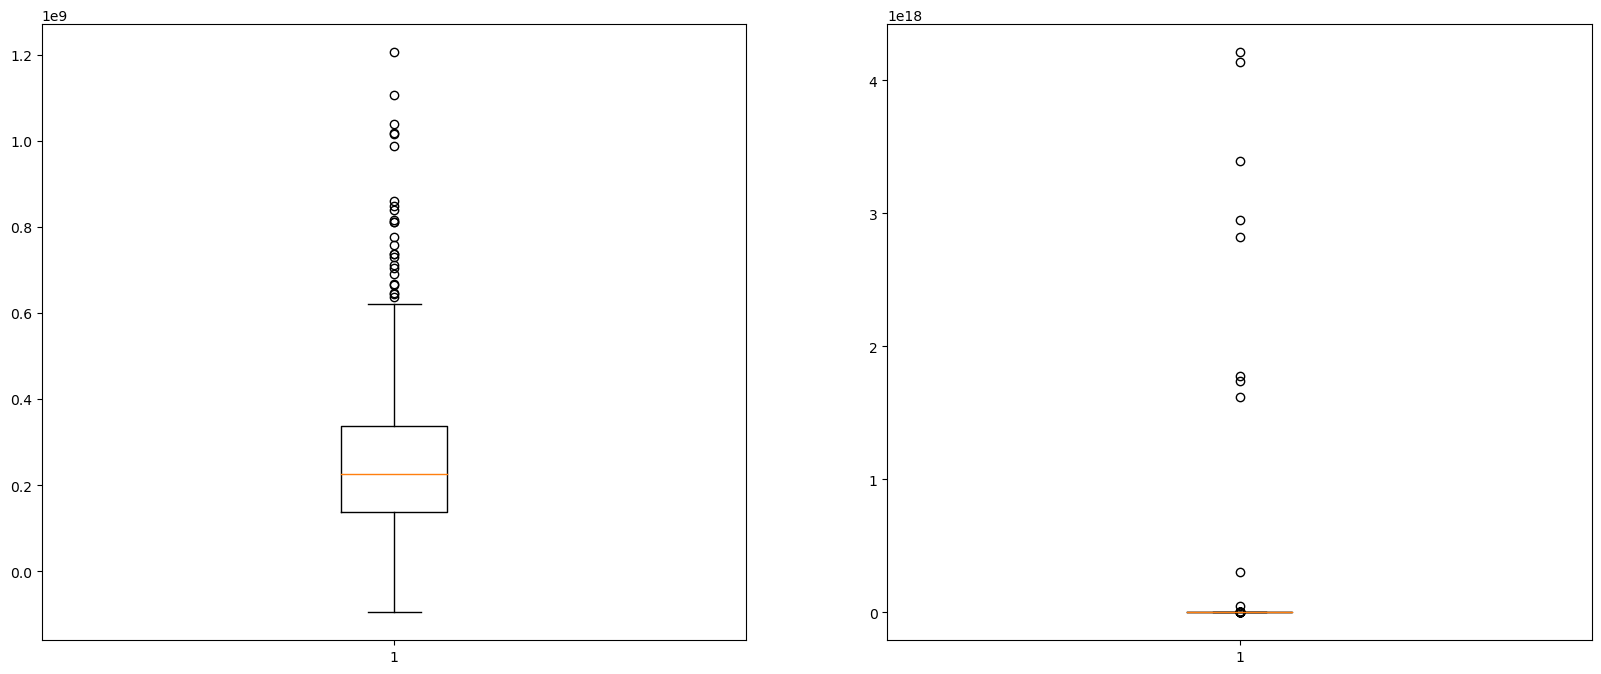

In [20]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.boxplot(Rural_data_income['98'])
plt.subplot(1,2,2)
plt.boxplot(Urban_data_income['98'])
plt.show()

In [21]:
IQR_R98 = IQR(Rural_data_income['98'])
IQR_U98 = IQR(Urban_data_income['98'])

In [22]:
shapiro_R98_zscore = stats.shapiro(IQR_R98)
shapiro_U98_zscore = stats.shapiro(IQR_U98)
shapiro_R98_zscore, shapiro_U98_zscore

(ShapiroResult(statistic=0.9695749359371229, pvalue=4.854370845097498e-08),
 ShapiroResult(statistic=0.9694085006428471, pvalue=7.128858497174088e-10))

In [23]:
R_98_yeojohnson , _ = stats.yeojohnson(IQR_R98)
U_98_yeojohnson , _ = stats.yeojohnson(IQR_U98)
shapiro_R_98_yeojohnson = stats.shapiro(R_98_yeojohnson)
shapiro_U_98_yeojohnson = stats.shapiro(U_98_yeojohnson)
shapiro_R_98_yeojohnson, shapiro_U_98_yeojohnson

(ShapiroResult(statistic=0.9724520359438084, pvalue=1.7486708453719201e-07),
 ShapiroResult(statistic=0.9744589857723119, pvalue=9.814519444952501e-09))

In [24]:
stats.mannwhitneyu(IQR_R98, IQR_U98)

MannwhitneyuResult(statistic=91544.5, pvalue=4.536052828866004e-19)

#### 99

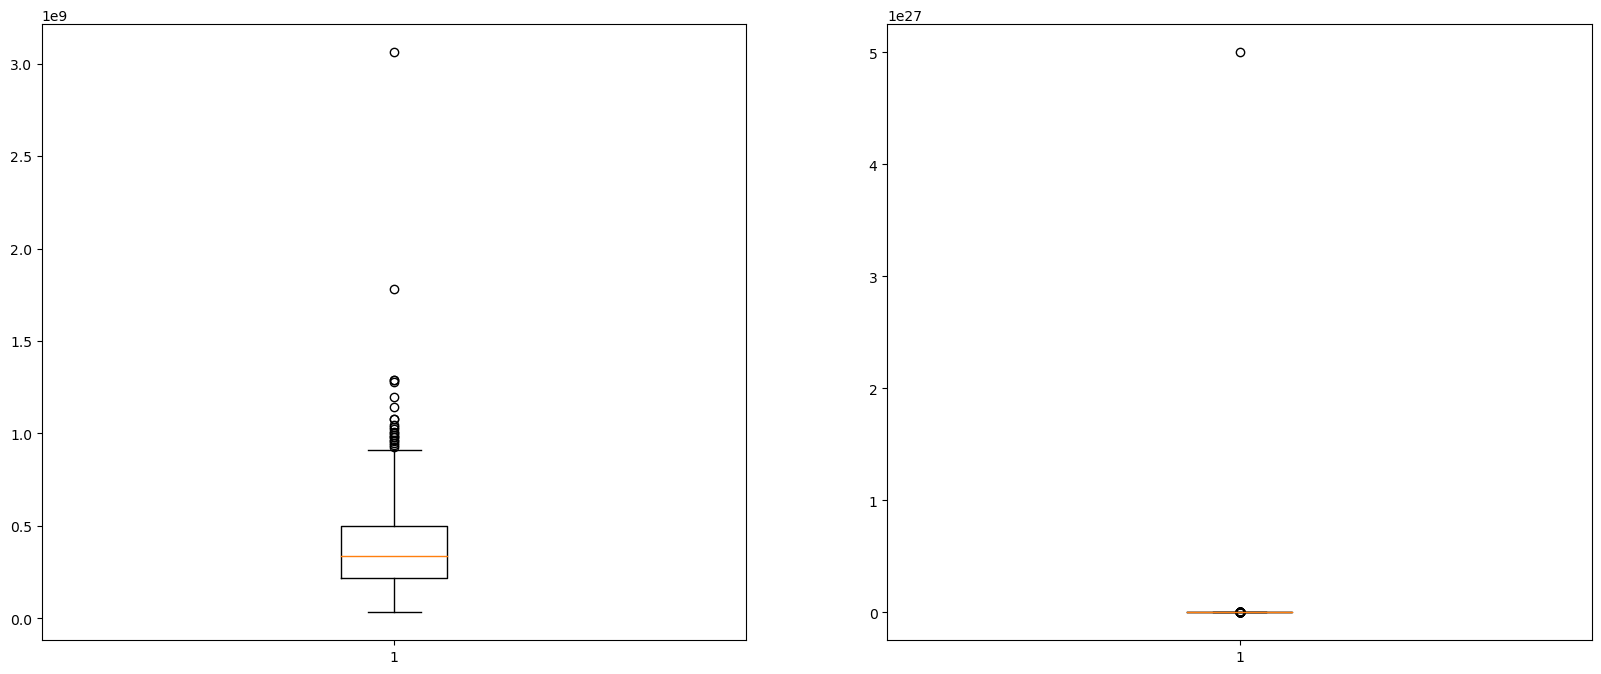

In [25]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.boxplot(Rural_data_income['99'])
plt.subplot(1,2,2)
plt.boxplot(Urban_data_income['99'])
plt.show()

In [26]:
IQR_R99 = IQR(Rural_data_income['99'])
IQR_U99 = IQR(Urban_data_income['99'])

In [27]:
shapiro_R_99 = stats.shapiro(IQR_R99)
shapiro_U_99 = stats.shapiro(IQR_U99)
shapiro_R_99, shapiro_U_99

(ShapiroResult(statistic=0.9539711277083858, pvalue=8.468508124234937e-11),
 ShapiroResult(statistic=0.9555071578193729, pvalue=4.702831391210644e-12))

In [28]:
R_99_yeojohnson , _ = stats.yeojohnson(IQR_R99)
U_99_yeojohnson , _ = stats.yeojohnson(IQR_U99)
shapiro_R_99_yeojohnson = stats.shapiro(R_99_yeojohnson)
shapiro_U_99_yeojohnson = stats.shapiro(U_99_yeojohnson)
shapiro_R_99_yeojohnson, shapiro_U_99_yeojohnson

(ShapiroResult(statistic=0.9869211896510252, pvalue=0.00037147103924328723),
 ShapiroResult(statistic=0.992634081287441, pvalue=0.0067981050332185655))

In [29]:
R_99_log = np.log(IQR_R99)
U_99_log = np.log(IQR_U99)
shapiro_R_99_log = stats.shapiro(R_99_log)
shapiro_U_99_log = stats.shapiro(U_99_log)
shapiro_R_99_log, shapiro_U_99_log

(ShapiroResult(statistic=0.9432381388956175, pvalue=2.813102644502228e-12),
 ShapiroResult(statistic=0.9289784230269206, pvalue=9.646035119854514e-16))

In [30]:
R_99_sqrt = np.sqrt(IQR_R99)
U_99_sqrt = np.sqrt(IQR_U99)
shapiro_R_99_sqrt = stats.shapiro(R_99_sqrt)
shapiro_U_99_sqrt = stats.shapiro(U_99_sqrt)
shapiro_R_99_sqrt, shapiro_U_99_sqrt

(ShapiroResult(statistic=0.9870610169686036, pvalue=0.00040775237522980626),
 ShapiroResult(statistic=0.992592954410007, pvalue=0.006546715496329971))

In [31]:
stats.mannwhitneyu(IQR_R99, IQR_U99)

MannwhitneyuResult(statistic=99893.0, pvalue=7.735062470758539e-11)

#### 1400

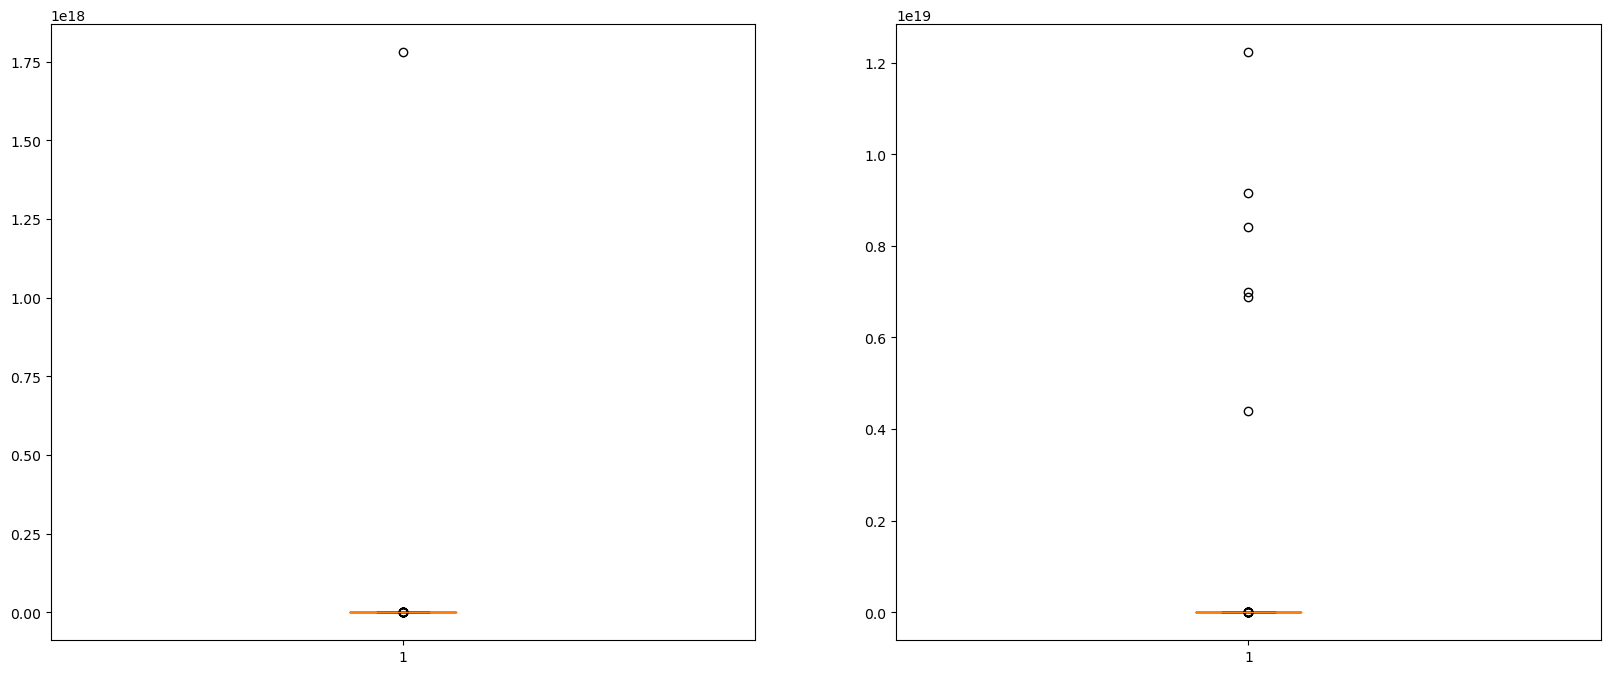

In [32]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.boxplot(Rural_data_income['1400'])
plt.subplot(1,2,2)
plt.boxplot(Urban_data_income['1400'])
plt.show()

In [33]:
zscore_R1400 = zscore(Rural_data_income['1400'])
zscore_U1400 = zscore(Urban_data_income['1400'])

In [34]:
shapiro_R_1400 = stats.shapiro(zscore_R1400)
shapiro_U_1400 = stats.shapiro(zscore_U1400)
shapiro_R_1400, shapiro_U_1400

(ShapiroResult(statistic=0.7163183916826167, pvalue=5.518614957384791e-28),
 ShapiroResult(statistic=0.8576947807177788, pvalue=1.0961953574035329e-23))

In [35]:
R_1400_yeojohnson , _ = stats.yeojohnson(zscore_R1400)
U_1400_yeojohnson , _ = stats.yeojohnson(zscore_U1400)
shapiro_R_1400_yeojohnson = stats.shapiro(R_1400_yeojohnson)
shapiro_U_1400_yeojohnson = stats.shapiro(U_1400_yeojohnson)
shapiro_R_1400_yeojohnson, shapiro_U_1400_yeojohnson

(ShapiroResult(statistic=0.9756210577837451, pvalue=2.7220571608732555e-07),
 ShapiroResult(statistic=0.9878526831208875, pvalue=3.425981504140718e-05))

In [36]:
R_1400_log = np.log(zscore_R1400)
U_1400_log = np.log(zscore_U1400)
shapiro_R_1400_log = stats.shapiro(R_1400_log)
shapiro_U_1400_log = stats.shapiro(U_1400_log)
shapiro_R_1400_log, shapiro_U_1400_log

(ShapiroResult(statistic=0.960195409204755, pvalue=3.058193722795599e-10),
 ShapiroResult(statistic=0.9519504290182608, pvalue=1.199826949372247e-13))

In [37]:
R_1400_sqrt = np.sqrt(zscore_R1400)
U_1400_sqrt = np.sqrt(zscore_U1400)
shapiro_R_1400_sqrt = stats.shapiro(R_1400_sqrt)
shapiro_U_1400_sqrt = stats.shapiro(U_1400_sqrt)
shapiro_R_1400_sqrt, shapiro_U_1400_sqrt

(ShapiroResult(statistic=0.9377633679815864, pvalue=1.923339802855322e-13),
 ShapiroResult(statistic=0.9765260092670183, pvalue=1.1825361884965448e-08))

In [38]:
stats.mannwhitneyu(zscore_R1400, zscore_U1400)

MannwhitneyuResult(statistic=120637.5, pvalue=8.195394402111878e-12)

#### 1401

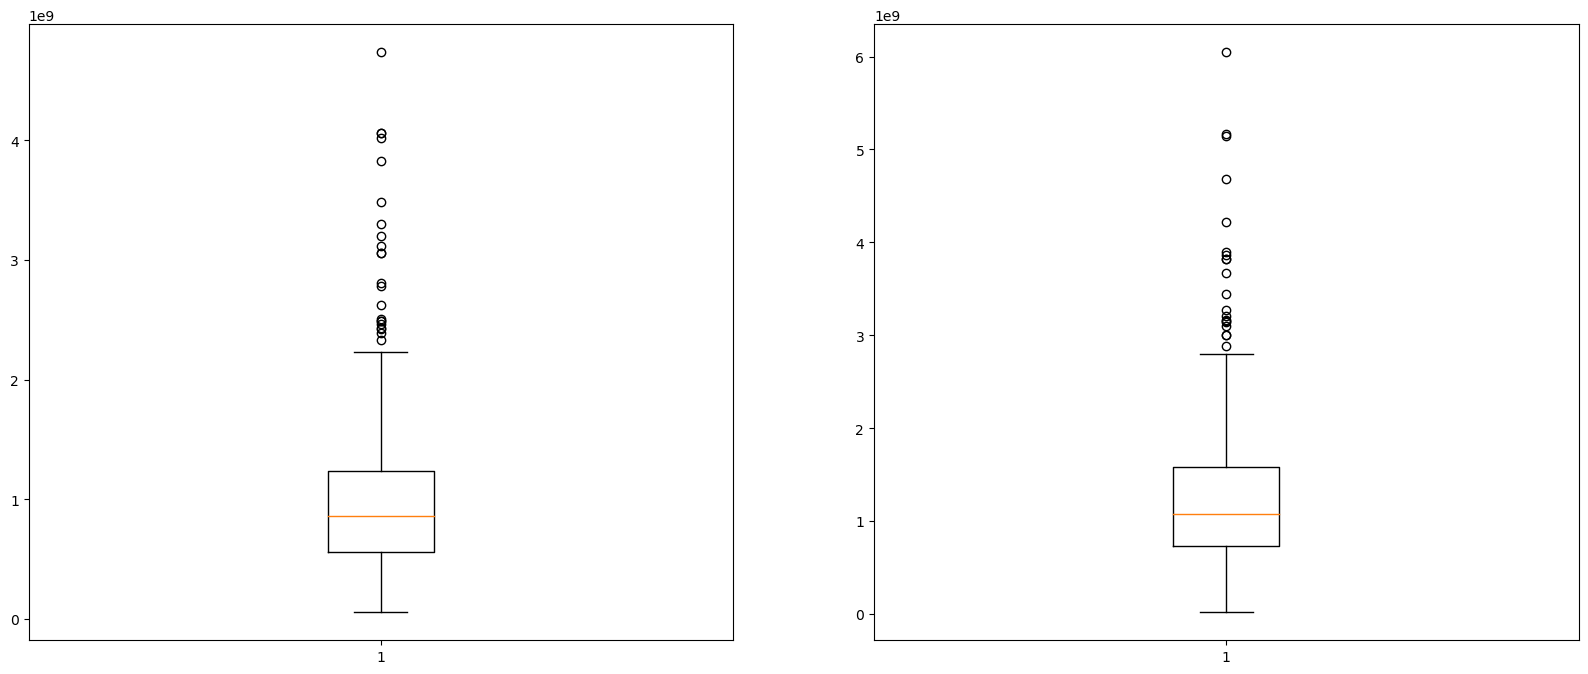

In [39]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.boxplot(Rural_data_income['1401'])
plt.subplot(1,2,2)
plt.boxplot(Urban_data_income['1401'])
plt.show()

In [40]:
zscore_R1401 = zscore(Rural_data_income['1401'])
zscore_U1401 = zscore(Urban_data_income['1401'])

In [41]:
shapiro_R_1401 = stats.shapiro(zscore_R1401)
shapiro_U_1401 = stats.shapiro(zscore_U1401)
shapiro_R_1401, shapiro_U_1401

(ShapiroResult(statistic=0.9513016225054542, pvalue=2.0501622579656695e-11),
 ShapiroResult(statistic=0.9580054985568499, pvalue=1.2374867602117966e-12))

In [42]:
R_1401_yeojohnson , _ = stats.yeojohnson(zscore_R1401)
U_1401_yeojohnson , _ = stats.yeojohnson(zscore_U1401)
shapiro_R_1401_yeojohnson = stats.shapiro(R_1401_yeojohnson)
shapiro_U_1401_yeojohnson = stats.shapiro(U_1401_yeojohnson)
shapiro_R_1401_yeojohnson, shapiro_U_1401_yeojohnson

(ShapiroResult(statistic=0.9942320336046471, pvalue=0.06895674262356004),
 ShapiroResult(statistic=0.9955206253859065, pvalue=0.059015209160800386))

In [43]:
stats.ttest_ind(R_1401_yeojohnson, U_1401_yeojohnson)

TtestResult(statistic=-40.92253932709008, pvalue=1.0915159835703472e-224, df=1121.0)

#### Total

In [44]:
df_U = paid_jobs[f'U98'].merge(Freelance_Jobs[f'U98'], how = 'outer')

df_U = df_U.merge(Miscellaneous[f'U98'], how = 'outer')

df_U = df_U.merge(Subsidy[f'U98'], how='outer')

df_U = df_U.merge(paid_jobs[f'U99'], how = 'outer')

df_U = df_U.merge(Freelance_Jobs[f'U99'], how = 'outer')

df_U = df_U.merge(Miscellaneous[f'U99'], how = 'outer')

df_U = df_U.merge(Subsidy[f'U99'], how='outer')

df_U = df_U.merge(paid_jobs[f'U1400'], how = 'outer')

df_U = df_U.merge(Freelance_Jobs[f'U1400'], how = 'outer')

df_U = df_U.merge(Miscellaneous[f'U1400'], how = 'outer')

df_U = df_U.merge(Subsidy[f'U1400'], how='outer')

df_U = df_U.merge(paid_jobs[f'U1401'], how = 'outer')

df_U = df_U.merge(Freelance_Jobs[f'U1401'], how = 'outer')

df_U = df_U.merge(Miscellaneous[f'U1401'], how = 'outer')

df_U = df_U.merge(Subsidy[f'U1401'], how='outer')

In [45]:
Total_Urban = df_U.drop(columns='Address').fillna(0).astype('float').sum(axis = 1)

In [46]:
df_R = paid_jobs[f'R98'].merge(Freelance_Jobs[f'R98'], how = 'outer')

df_R = df_R.merge(Miscellaneous[f'R98'], how = 'outer')

df_R = df_R.merge(Subsidy[f'R98'], how='outer')

df_R = df_R.merge(paid_jobs[f'R99'], how = 'outer')

df_R = df_R.merge(Freelance_Jobs[f'R99'], how = 'outer')

df_R = df_R.merge(Miscellaneous[f'R99'], how = 'outer')

df_R = df_R.merge(Subsidy[f'R99'], how='outer')

df_R = df_R.merge(paid_jobs[f'R1400'], how = 'outer')

df_R = df_R.merge(Freelance_Jobs[f'R1400'], how = 'outer')

df_R = df_R.merge(Miscellaneous[f'R1400'], how = 'outer')

df_R = df_R.merge(Subsidy[f'R1400'], how='outer')

df_R = df_R.merge(paid_jobs[f'R1401'], how = 'outer')

df_R = df_R.merge(Freelance_Jobs[f'R1401'], how = 'outer')

df_R = df_R.merge(Miscellaneous[f'R1401'], how = 'outer')

df_R = df_R.merge(Subsidy[f'R1401'], how='outer')

In [47]:
Total_Rural = df_R.drop(columns='Address').fillna(0).astype('float').sum(axis = 1)

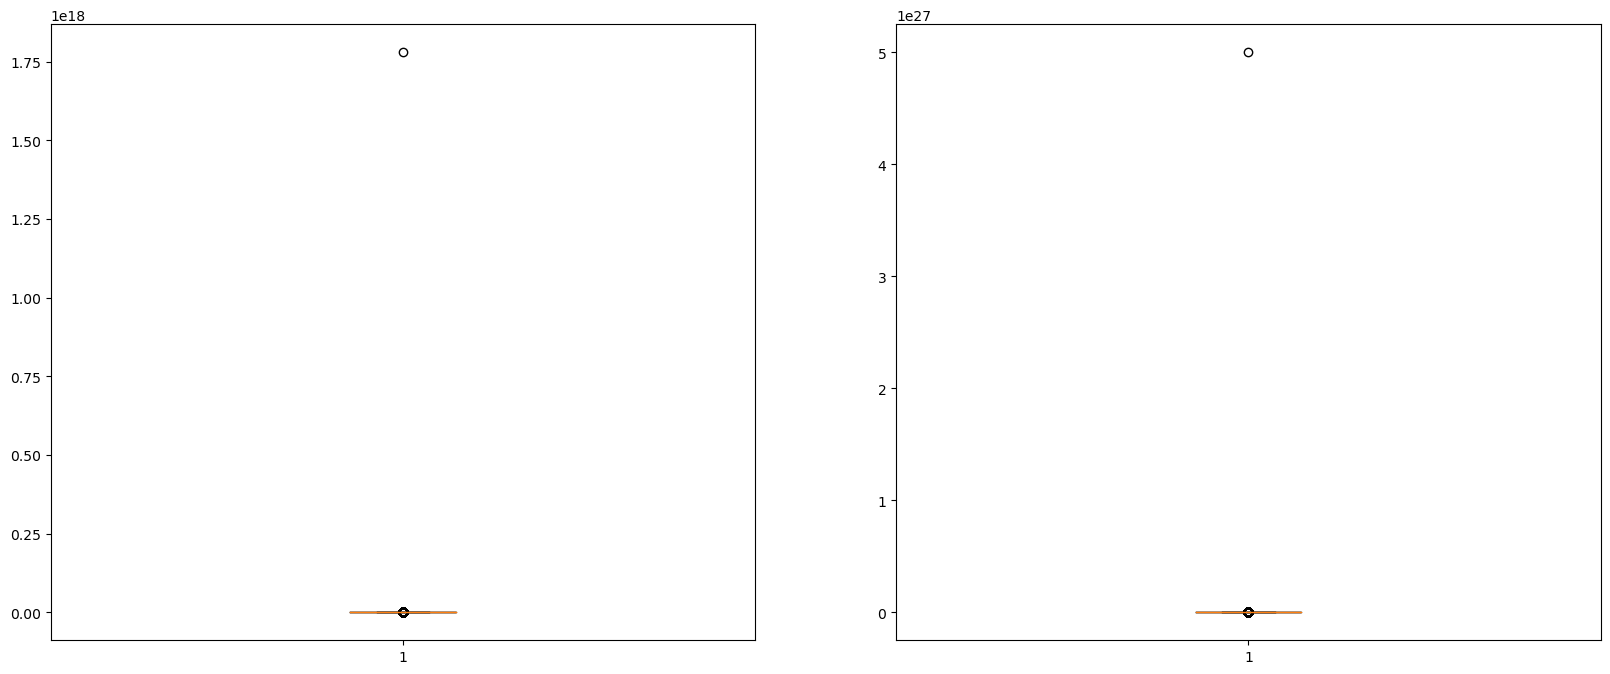

In [48]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.boxplot(Total_Rural)
plt.subplot(1,2,2)
plt.boxplot(Total_Urban)
plt.show()

In [49]:
IQR_TotalR = IQR(Total_Rural)
IQR_TotalU = IQR(Total_Urban)

In [50]:
shapiro_Total_Rural = stats.shapiro(IQR_TotalR)
shapiro_Total_Urban = stats.shapiro(IQR_TotalU)
shapiro_Total_Rural, shapiro_Total_Urban

d:\miniconda3\envs\bootcamp\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5587.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=0.806118756850325, pvalue=2.2545376542355593e-58),
 ShapiroResult(statistic=0.8083006174091828, pvalue=4.527452338808266e-63))

In [51]:
R_Total_yeojohnson , _ = stats.yeojohnson(IQR_TotalR)
U_Total_yeojohnson , _ = stats.yeojohnson(IQR_TotalU)
shapiro_R_Total_yeojohnson = stats.shapiro(R_Total_yeojohnson)
shapiro_U_Total_yeojohnson = stats.shapiro(U_Total_yeojohnson)
shapiro_R_Total_yeojohnson, shapiro_U_Total_yeojohnson

(ShapiroResult(statistic=0.8052094479922515, pvalue=1.8509361813540938e-58),
 ShapiroResult(statistic=0.8077533065573452, pvalue=3.9915014654052704e-63))

In [52]:
stats.mannwhitneyu(IQR_TotalR, IQR_TotalU)

MannwhitneyuResult(statistic=11206427.0, pvalue=1.540464260125883e-13)

با توجه به نتایج میشه با درصد اطمینان بالایی گفت که درامد این دو گروه با هم برابر نیست چه در به تفکیک سال و چه در طول 4 سال